In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from crossval import cross_validate
from mlp import mlp_train, mlp_predict, logistic, nll
from kernelsvm import kernel_svm_train, kernel_svm_predict
from scipy.io import loadmat
from plotutils import plot_data, plot_surface
import copy

In [14]:
# load synthetic binary-class data from MATLAB data file

variables = dict()
loadmat('syntheticData.mat', variables)

# use some list comprehensions to clean up MATLAB data conversion
train_labels = [vector[0].ravel() for vector in variables['trainLabels']]
train_data = [matrix[0] for matrix in variables['trainData']]
test_labels = [vector[0].ravel() for vector in variables['testLabels']]
test_data = [matrix[0] for matrix in variables['testData']]

# set constants for convenience

num_datasets = len(train_labels)
num_models = 5
num_folds = 4

# initialize matrix to store test accuracies
test_accuracy = np.zeros((num_datasets, num_models))

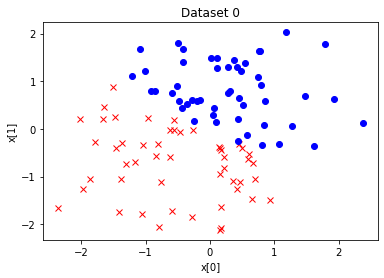

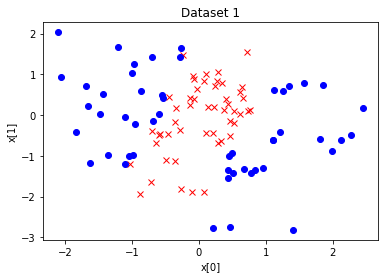

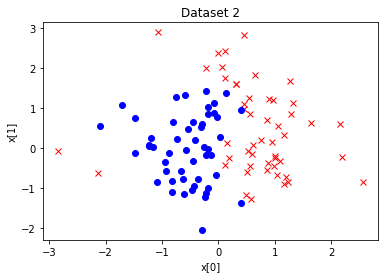

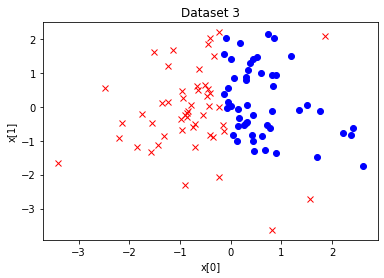

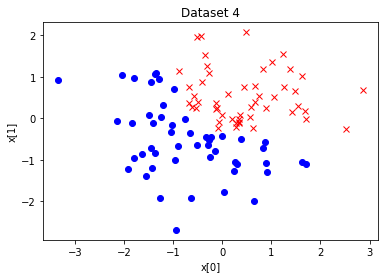

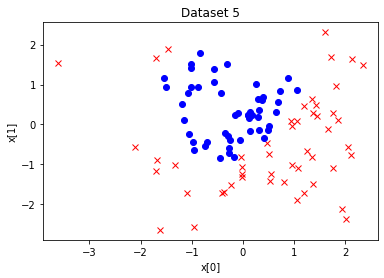

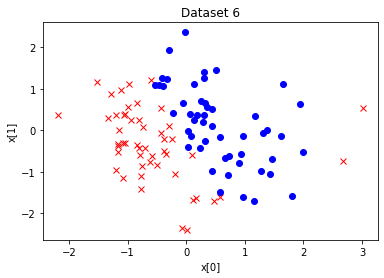

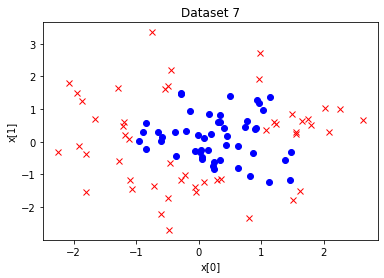

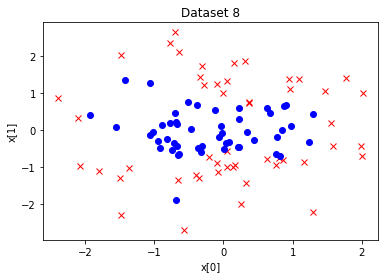

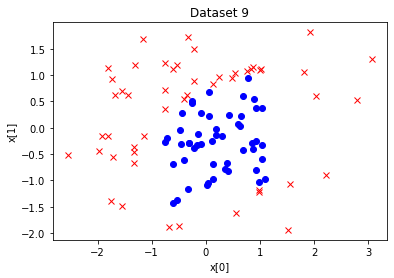

In [15]:
# plot training data

for i in range(num_datasets):
    plt.figure()
    plot_data(train_data[i], train_labels[i])
    plt.title('Dataset %d' % i)
    plt.xlabel('x[0]')
    plt.ylabel('x[1]')
    plt.show()

Exiting because total change was 8.474893e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.542899e-09, a sign that we have reached a local minimum.
Exiting because total change was 7.404937e-09, a sign that we have reached a local minimum.
Exiting because total change was 7.331778e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.963818e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.657469e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.923289e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.834031e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.546749e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.831718e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.764787e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


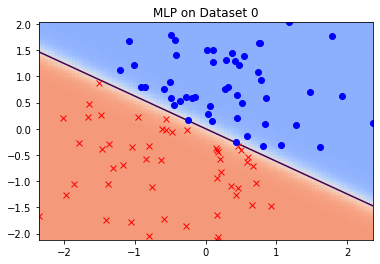

Exiting because total change was 9.720588e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.967640e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.312336e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.816497e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.922960e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.291289e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.652219e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.610245e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.666518e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.856584e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.742103e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


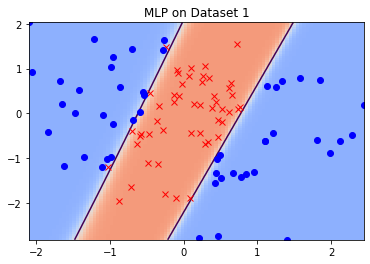

Exiting because total change was 7.643169e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.826674e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.644243e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.519950e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.902473e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.485017e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.696969e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.639270e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.777821e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.994348e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.800784e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


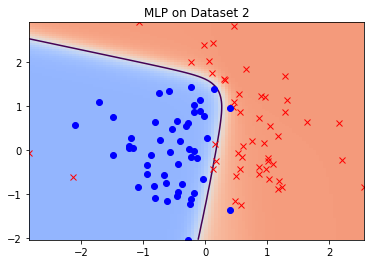

Exiting because total change was 8.824763e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.859541e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.173531e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.822522e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.289344e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.328471e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.610889e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.694135e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.773228e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.779582e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.730838e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


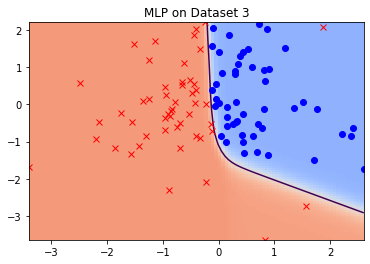

Exiting because total change was 9.778253e-09, a sign that we have reached a local minimum.
Exiting because total change was 7.707298e-09, a sign that we have reached a local minimum.
Exiting because total change was 7.618595e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.479016e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.919195e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.544653e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.893734e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.407546e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.837814e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.865628e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.531788e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


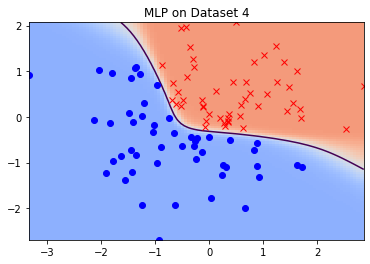

Exiting because total change was 9.803215e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.193046e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.410198e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.162946e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.200194e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.630565e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.475756e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.627908e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.668267e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.914169e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.657978e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


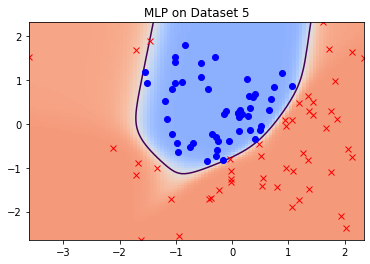

Exiting because total change was 9.470464e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.270535e-09, a sign that we have reached a local minimum.
Exiting because total change was 7.719067e-09, a sign that we have reached a local minimum.
Exiting because total change was 8.584359e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.303465e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.923397e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.573850e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.196019e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.748016e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.706833e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.988101e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


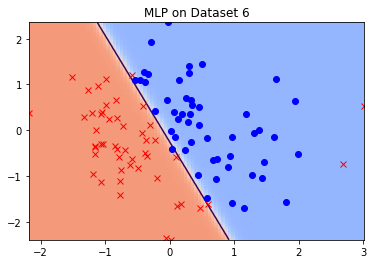

Exiting because total change was 9.224216e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.876000e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.773616e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.981486e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.990595e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.259228e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.743984e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.938108e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.502844e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.674086e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.541387e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


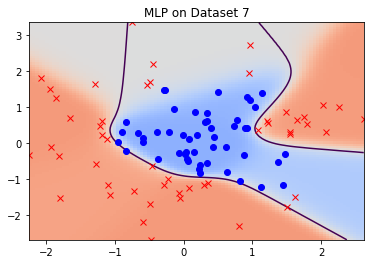

Exiting because total change was 9.493579e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.896197e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.724941e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.453529e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.223375e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.551898e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.442150e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.632010e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.753832e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.954693e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.624571e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


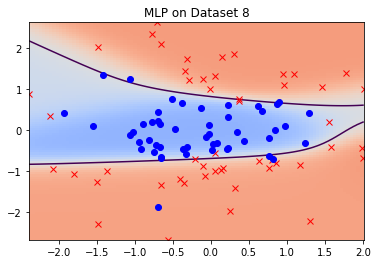

Exiting because total change was 9.298204e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.185659e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.664310e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.101161e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.373936e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.531309e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.848637e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.988765e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.540092e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.816733e-09, a sign that we have reached a local minimum.
Exiting because total change was 9.884095e-09, a sign that we have reached a loc

/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


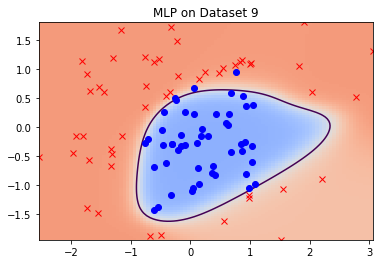

In [16]:
# run multi-layer perceptron with cross-validation to select model parameters and structure on all datasets
# this will take a few minutes

for i in range(num_datasets):
    structures = [[1], [4], [2, 2], [2, 4], [4, 4]]
    lambda_vals = [0.01, 0.1, 1]
    
    params = {
        'max_iter': 400,
        'activation_function': logistic,
        'loss_function': nll
    }
    
    best_params = []
    best_score = 0
    
    for j in range(len(structures)):
        for k in range(len(lambda_vals)):
            params['num_hidden_units']= structures[j]
            params['lambda'] = lambda_vals[k]
            
            cv_score, models = cross_validate(mlp_train, mlp_predict, train_data[i], train_labels[i], num_folds, params)
            
            if cv_score > best_score:
                best_score = cv_score
                best_params = copy.copy(params)
                
    mlp_model = mlp_train(train_data[i], train_labels[i], best_params)
    predictions, _, _, _ = mlp_predict(test_data[i], mlp_model)
    test_accuracy[i, 0] = np.mean(predictions == test_labels[i])
    
    print("MLP had test accuracy %f on Dataset %d" % (test_accuracy[i, 0], i))
    print("with structure %s and lambda = %f" % (repr(best_params['num_hidden_units']), best_params['lambda']))
    
    plt.figure()
    plot_surface(mlp_predict, mlp_model, train_data[i])
    plot_data(train_data[i], train_labels[i])
    plt.title('MLP on Dataset %d' % i)
    plt.show()

Linear SVM had test accuracy 0.989000 on Dataset 0
with C = 10.000000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


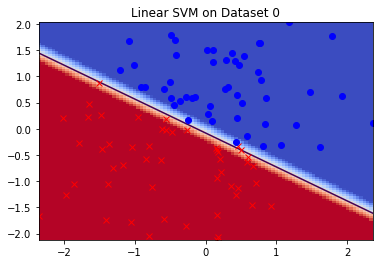

Linear SVM had test accuracy 0.508000 on Dataset 1
with C = 1.000000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


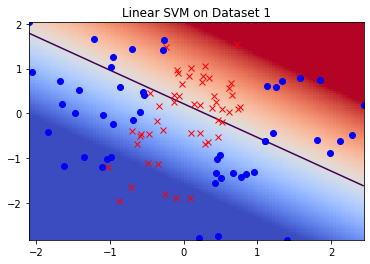

Linear SVM had test accuracy 0.869000 on Dataset 2
with C = 10.000000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


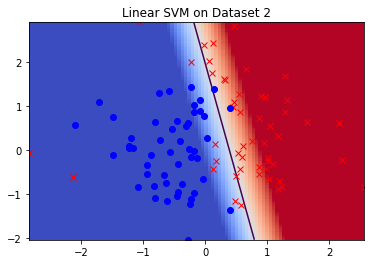

Linear SVM had test accuracy 0.966000 on Dataset 3
with C = 10.000000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


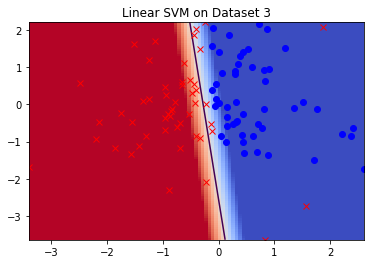

Linear SVM had test accuracy 0.878000 on Dataset 4
with C = 1.000000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


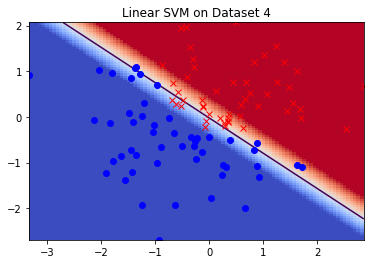

Linear SVM had test accuracy 0.817000 on Dataset 5
with C = 10.000000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


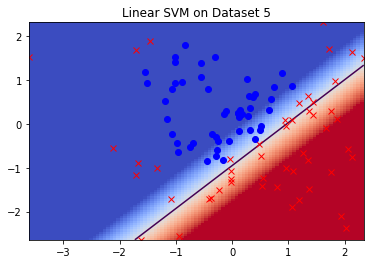

Linear SVM had test accuracy 0.929000 on Dataset 6
with C = 1.000000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


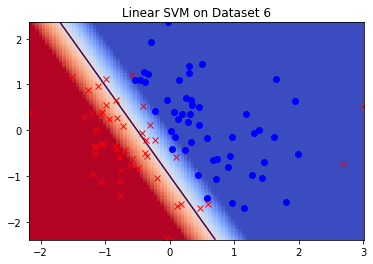

Linear SVM had test accuracy 0.732000 on Dataset 7
with C = 1.000000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


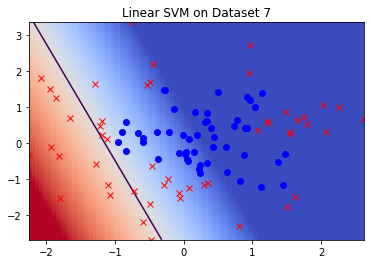

Linear SVM had test accuracy 0.522000 on Dataset 8
with C = 0.001000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


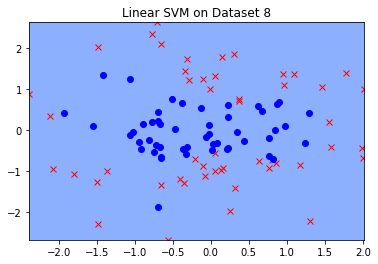

Linear SVM had test accuracy 0.734000 on Dataset 9
with C = 10.000000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


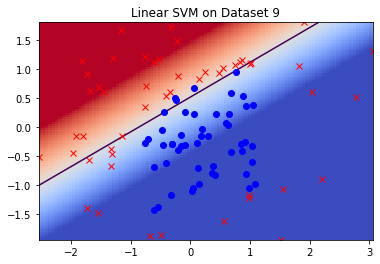

In [17]:
# run linear SVM

c_vals = 10 ** np.linspace(-3, 1, 5)


for i in range(num_datasets):
    best_params = []
    best_score = 0

    for j in range(len(c_vals)):
        params = {
            'kernel': 'linear',
            'C': c_vals[j]
        }
        
        cv_score, _ = cross_validate(kernel_svm_train, kernel_svm_predict, train_data[i], train_labels[i], num_folds, params)
        
        if cv_score > best_score:
            best_score = cv_score
            best_params = params
            
    lin_svm_model = kernel_svm_train(train_data[i], train_labels[i], best_params)
    predictions, _ = kernel_svm_predict(test_data[i], lin_svm_model)
    test_accuracy[i, 1] = np.mean(predictions == test_labels[i])
    
    print("Linear SVM had test accuracy %f on Dataset %d" % (test_accuracy[i, 1], i))
    print("with C = %f" % (best_params['C']))
    
    plt.figure()
    plot_surface(kernel_svm_predict, lin_svm_model, train_data[i])
    plot_data(train_data[i], train_labels[i])
    plt.title('Linear SVM on Dataset %d' % i)
    plt.show()

Polynomial SVM had test accuracy 0.982000 on Dataset 0
with C = 1.000000, order = 3


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


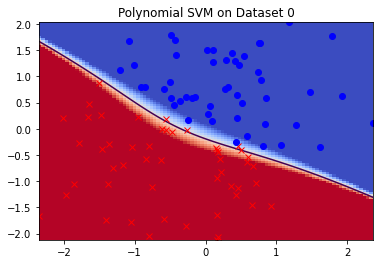

Polynomial SVM had test accuracy 0.967000 on Dataset 1
with C = 10.000000, order = 4


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


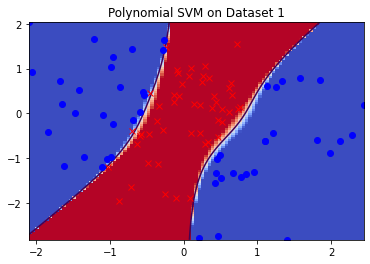

Polynomial SVM had test accuracy 0.945000 on Dataset 2
with C = 10.000000, order = 3


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


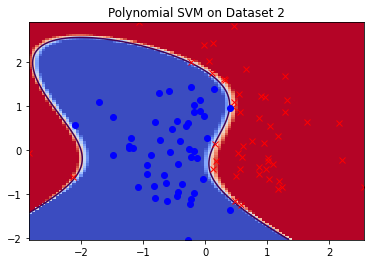

Polynomial SVM had test accuracy 0.938000 on Dataset 3
with C = 1.000000, order = 4


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


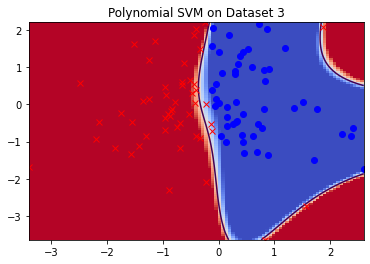

Polynomial SVM had test accuracy 0.960000 on Dataset 4
with C = 10.000000, order = 3


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


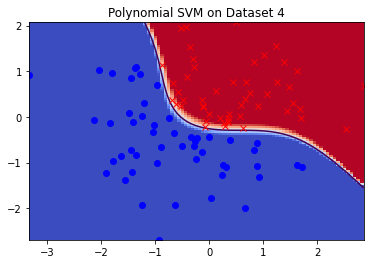

Polynomial SVM had test accuracy 0.941000 on Dataset 5
with C = 10.000000, order = 3


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


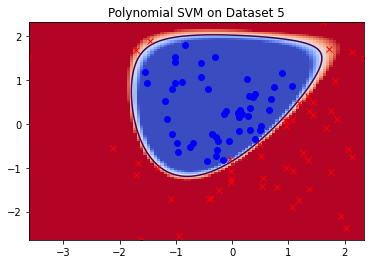

Polynomial SVM had test accuracy 0.940000 on Dataset 6
with C = 1.000000, order = 2


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


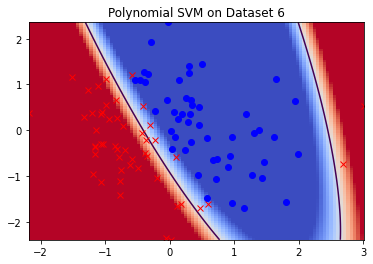

Polynomial SVM had test accuracy 0.930000 on Dataset 7
with C = 1.000000, order = 4


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


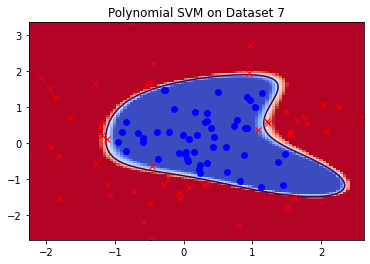

Polynomial SVM had test accuracy 0.896000 on Dataset 8
with C = 10.000000, order = 4


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


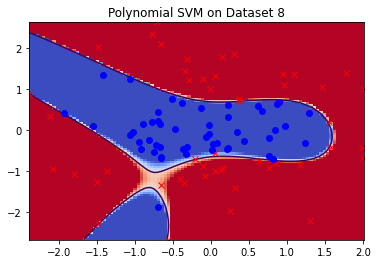

Polynomial SVM had test accuracy 0.938000 on Dataset 9
with C = 10.000000, order = 2


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)


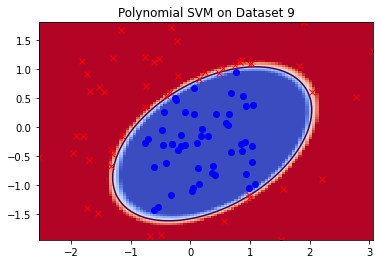

In [18]:
# run polynomial SVM

c_vals = 10 ** np.linspace(-3, 1, 5)
orders = [2, 3, 4]

for i in range(num_datasets):
    best_params = []
    best_score = 0
    
    for j in range(len(c_vals)):
        for k in range(len(orders)):
            params = {
                'kernel': 'polynomial',
                'C': c_vals[j],
                'order': orders[k]
            }
            
            cv_score, _ = cross_validate(kernel_svm_train, kernel_svm_predict, train_data[i], train_labels[i], num_folds, params)
            
            if cv_score > best_score:
                best_score = cv_score
                best_params = params
            
    poly_svm_model = kernel_svm_train(train_data[i], train_labels[i], best_params)
    predictions, _ = kernel_svm_predict(test_data[i], poly_svm_model)
    test_accuracy[i, 2] = np.mean(predictions == test_labels[i])
    
    print("Polynomial SVM had test accuracy %f on Dataset %d" % (test_accuracy[i, 2], i))
    print("with C = %f, order = %d" % (best_params['C'], best_params['order']))
    
    plt.figure()
    plot_surface(kernel_svm_predict, poly_svm_model, train_data[i])
    plot_data(train_data[i], train_labels[i])
    plt.title('Polynomial SVM on Dataset %d' % i)
    plt.show()

[autoreload of kernelsvm failed: Traceback (most recent call last):
  File "/Users/adamrankin/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/adamrankin/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/adamrankin/opt/anaconda3/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/adamrankin/opt/anaconda3/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_remov

RBF SVM had test accuracy 0.534000 on Dataset 0
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


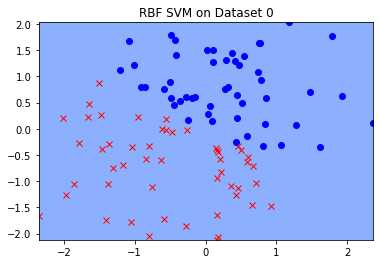

/Users/adamrankin/school/hw3-release/hw3-programming/kernelsvm.py:53: RuntimeWarning: overflow encountered in exp
  print(rTr.shape)


RBF SVM had test accuracy 0.515000 on Dataset 1
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


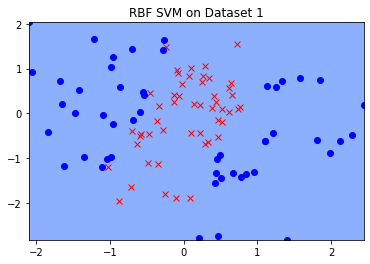

RBF SVM had test accuracy 0.533000 on Dataset 2
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


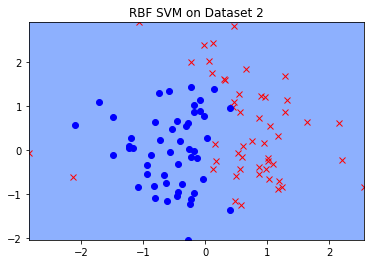

/Users/adamrankin/school/hw3-release/hw3-programming/kernelsvm.py:53: RuntimeWarning: overflow encountered in exp
  print(rTr.shape)


RBF SVM had test accuracy 0.508000 on Dataset 3
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


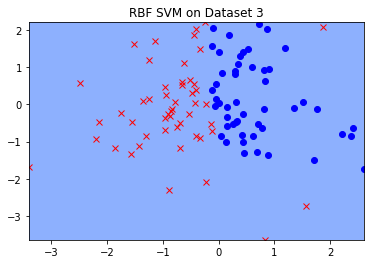

/Users/adamrankin/school/hw3-release/hw3-programming/kernelsvm.py:53: RuntimeWarning: overflow encountered in exp
  print(rTr.shape)


RBF SVM had test accuracy 0.481000 on Dataset 4
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


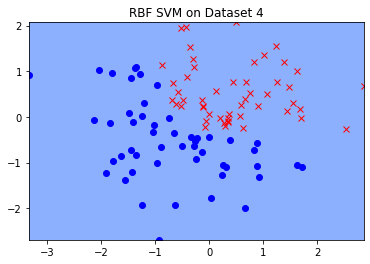

/Users/adamrankin/school/hw3-release/hw3-programming/kernelsvm.py:53: RuntimeWarning: overflow encountered in exp
  print(rTr.shape)


RBF SVM had test accuracy 0.546000 on Dataset 5
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


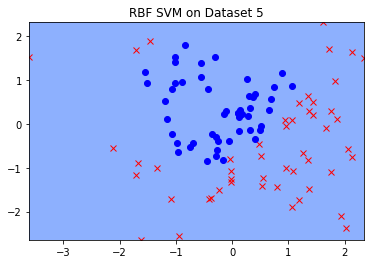

RBF SVM had test accuracy 0.550000 on Dataset 6
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


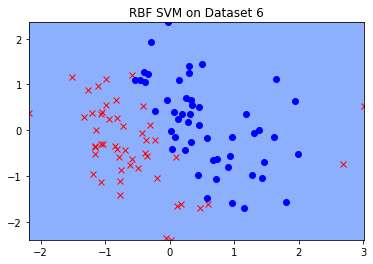

/Users/adamrankin/school/hw3-release/hw3-programming/kernelsvm.py:53: RuntimeWarning: overflow encountered in exp
  print(rTr.shape)


RBF SVM had test accuracy 0.566000 on Dataset 7
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


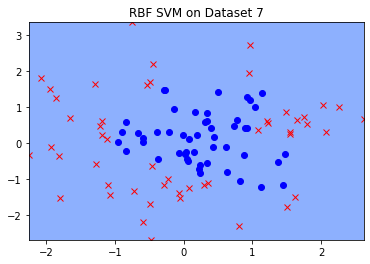

RBF SVM had test accuracy 0.522000 on Dataset 8
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


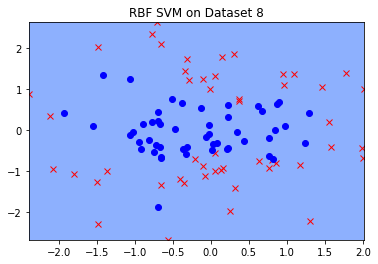

/Users/adamrankin/school/hw3-release/hw3-programming/kernelsvm.py:53: RuntimeWarning: overflow encountered in exp
  print(rTr.shape)


RBF SVM had test accuracy 0.533000 on Dataset 9
with C = 0.001000, sigma = 0.100000


/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:62: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x_grid, y_grid, z_grid, cmap='coolwarm', vmin=-0.5, vmax=1.5)
/Users/adamrankin/school/hw3-release/hw3-programming/plotutils.py:63: UserWarning: No contour levels were found within the data range.
  plt.contour(x_grid, y_grid, z_grid, levels=[0.5])


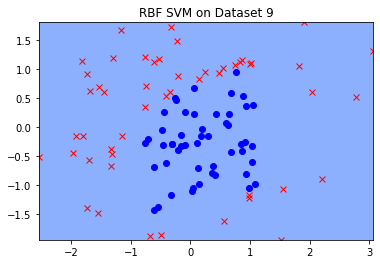

In [52]:
# run RBF SVM

c_vals = 10 ** np.linspace(-3, 3, 7)
sigmas = np.linspace(0.1, 1.5, 15)


for i in range(num_datasets):
    best_params = []
    best_score = 0

    for j in range(len(c_vals)):
        for k in range(len(sigmas)):
            params = {
                'kernel': 'rbf',
                'C': c_vals[j],
                'sigma': sigmas[k]
            }
            
            cv_score, _ = cross_validate(kernel_svm_train, kernel_svm_predict, train_data[i], train_labels[i], num_folds, params)
            
            if cv_score > best_score:
                best_score = cv_score
                best_params = params
                
    rbf_svm_model = kernel_svm_train(train_data[i], train_labels[i], best_params)
    predictions, _ = kernel_svm_predict(test_data[i], rbf_svm_model)
    test_accuracy[i, 3] = np.mean(predictions == test_labels[i])
    
    print("RBF SVM had test accuracy %f on Dataset %d" % (test_accuracy[i, 3], i))
    print("with C = %f, sigma = %f" % (best_params['C'], best_params['sigma']))
    
    plt.figure()
    plot_surface(kernel_svm_predict, rbf_svm_model, train_data[i])
    plot_data(train_data[i], train_labels[i])
    plt.title('RBF SVM on Dataset %d' % i)
    plt.show()

In [ ]:
# print accuracy table

methods = ['MLP\t', 'LinSVM\t', 'PolySVM\t', 'RBFSVM\t']

print((" " * 10) + "TEST ACCURACIES (Percent)")
print("-" * 50)

print("Set\t   " + "   ".join(["%d" % number for number in range(num_datasets)]))
print("-" * 50)
for i in range(len(methods)):
    line = [methods[i]]
    for j in range(num_datasets):
        line += ["%d" % (100 * test_accuracy[j, i])]
    print("  ".join(line))